In [ ]:
18.6 Homework¶
Write a program to find the minium of $$ f(x,y) = x^2/2 + y^2/3 - xy/4 $$
1, from your own code (except Monte Carlo)
2, from scipy

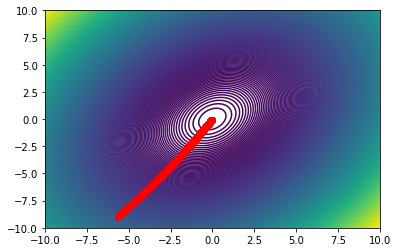

Minimum:  0.000681993051192
Number of Iterations:   1001
[-5.65110809 -8.97618605]
[-0.02388026 -0.044603  ]


In [15]:
#Oh look, we import the stuff again...
import numpy as np
import matplotlib.pyplot as plt

#Defines the function, derivatives, and inital starting points. 
def f(x):
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4

def derivative(f, xy, d=0.01):
    x, y = xy[0], xy[1]
    fx = (f([x+d/2,y])-f([x-d/2,y]))/d
    fy = (f([x,y+d/2])-f([x,y-d/2]))/d
    return np.array([fx,fy])


def init(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

xmin= -10 
xmax= 10
ymin= -10
ymax= 10


nx = np.linspace(xmin,xmax,400)
ny = np.linspace(ymin,ymax,400)

#creates mesh grid
x,y = np.meshgrid(nx,ny)

#performs the minimization 
def minimize_fix(f,x0, N=1000):
    x_NEW = x0
    converged = False
    x_hist = []
    x_hist.append(x_NEW)
    dx = 0.01

    for i in range(N):
        
        d_NEW = derivative(f, x_NEW) 
        x_STEP = x_NEW - d_NEW*dx
       
        if f(x_STEP)>f(x_NEW):
            converged = True
            break
        else:
            x_NEW = x_STEP
            x_hist.append(x_NEW)

    return converged, np.array(x_hist), f(x_NEW)


#I dont know if the graph is required bu there it is:
[x0, y0] = init(xmin, xmax, ymin, ymax)
converged, x_hist, fmin = minimize_fix(f, [x0,y0])
x,y = np.meshgrid(nx,ny)
z = f([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)

#Prints the stuff
plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
plt.show()
print('Minimum: ', fmin) 
print('Number of Iterations:  ', len(x_hist))
print(x_hist[0])
print(x_hist[-1])

In [30]:
#Part 2

import scipy.optimize as scop

[x0, y0] = init(xmin, xmax, ymin, ymax)
res = scop.minimize(f, [x0,y0], method='nelder-mead', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 48
         Function evaluations: 91
